# Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

### <span style='background :yellow'>Creazione di un dataframe unico
Date le vendite dei 12 mesi dell'anno in 12 differenti file csv, si vuole creare un unico dataframe che contiene i dati delle vendite di tutti i mesi

In [2]:
complete_dataframe = pd.DataFrame() # create an empty dataframe

In [3]:
# iterate over files in that directory
for filename in os.listdir('./Sales_Data/'):
    monthly_dataframe = pd.read_csv('./Sales_Data/' + filename)
    complete_dataframe = pd.concat([complete_dataframe, monthly_dataframe])

In [4]:
complete_dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### <span style='background :yellow'>Salvataggio del dataframe unico

In [5]:
complete_dataframe.to_csv('./Output/complete_dataframe.csv', index=False)

In [6]:
complete_dataframe = pd.read_csv('./Output/complete_dataframe.csv')
complete_dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### <span style='background :yellow'>Pulizia del dataframe
Si vuole pulire il dataframe eliminando tutte le righe che non contengono informazioni valide

In [7]:
# come si può osservare, ci sono due valori insensati:
# - nan: valori nulli
# - Quantity ordered: label rimasta per un qualche motivo
complete_dataframe['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

#### Pulizia dei valori nulli

In [8]:
len(complete_dataframe['Order ID']) # numero totale di righe rimaste

186850

In [9]:
# numero totale di righe con valore nullo da eliminare
nan_mask = complete_dataframe.isna().any(axis=1) # creazione della maschera
len(complete_dataframe[nan_mask])

545

In [10]:
# visualizzazione delle righe da eliminare
complete_dataframe.loc[nan_mask]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# eliminazione delle righe
complete_dataframe.dropna(inplace=True)

In [12]:
len(complete_dataframe['Order ID']) # numero totale di righe rimaste

186305

In [13]:
# il valore nan è stato eliminato, mancano solo i valori delle label
complete_dataframe['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

#### Pulizia delle label rimaste per errore

##### Soluzione 1

In [14]:
len(complete_dataframe['Order ID']) # numero totale di righe iniziali

186305

In [15]:
# numero totale di righe con label rimaste da eliminare
label_mask = complete_dataframe['Quantity Ordered'] == 'Quantity Ordered' # creazione della maschera
len(complete_dataframe[label_mask])

355

In [16]:
# visualizzazione delle righe da eliminare
complete_dataframe[label_mask].index
complete_dataframe.loc[complete_dataframe[label_mask].index]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
# eliminazione delle righe
complete_dataframe.drop(complete_dataframe[label_mask].index, axis=0, inplace=True)

In [18]:
len(complete_dataframe['Order ID']) # numero totale di righe rimaste

185950

In [19]:
# il valore della label è stato eliminato, mancano solo i valori nulli
complete_dataframe['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [20]:
print(complete_dataframe.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


##### Soluzione 2

In [21]:
#len(complete_dataframe['Order ID']) # numero totale di righe iniziali

In [22]:
# filtro direttamente le righe diverse dalla condizione di errore
#label_mask = complete_dataframe['Quantity Ordered'] != 'Quantity Ordered' # creazione della maschera
#complete_dataframe = complete_dataframe[label_mask]

In [23]:
#len(complete_dataframe['Order ID']) # numero totale di righe rimaste

### <span style='background :yellow'>Salvataggio del dataframe pulito

In [24]:
complete_dataframe.to_csv('./Output/clean_dataframe.csv', index=False)

In [25]:
clean_dataframe = pd.read_csv('./Output/clean_dataframe.csv')

### <span style='background :yellow'>Quale è stato il miglior mese per le vendite? Quanto si è guadagnato in quel mese?

#### Creazione nuova colonna "Sales"

In [26]:
#clean_dataframe['Quantity Ordered'] = clean_dataframe['Quantity Ordered'].astype('int16')
#clean_dataframe['Price Each'] = clean_dataframe['Price Each'].astype(float)
print(clean_dataframe.dtypes)

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


In [27]:
clean_dataframe['Sales'] = clean_dataframe['Quantity Ordered'] * clean_dataframe['Price Each']
#clean_dataframe['Sales'] = clean_dataframe.iloc[:,2:4].prod(axis=1)
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00


#### Creazione nuova colonna "Date time"
Questa nuova colonna contiene elementi di tipo __datetime__, da cui è possibile estrarre le ore, minuti, giorni, etc.

In [28]:
from datetime import datetime

In [29]:
clean_dataframe['Date time'] = pd.to_datetime(clean_dataframe['Order Date']) 

In [30]:
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00


#### Creazione nuova colonna "Month"

##### Soluzione 1 (mese come numero)

In [31]:
clean_dataframe['Month'] = clean_dataframe['Order Date'].apply(lambda x: x[0:2])
#clean_dataframe['Month'] = clean_dataframe['Order Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M').strftime("%B"))
clean_dataframe['Month'] = clean_dataframe['Month'].astype(int)
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4


##### Soluzione 2 (mese come stringa)

In [32]:
clean_dataframe['Month name'] = clean_dataframe['Date time'].dt.month_name()
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April


#### Eliminazione delle colonne che non servono all'analisi

In [33]:
small_dataframe = clean_dataframe[['Sales', 'Month']]
small_dataframe.head(3)

,Sales,Month
0,23.90,4
1,99.99,4
2,600.00,4


#### Raggruppamento delle vendite per mese

In [34]:
results = small_dataframe.groupby('Month').sum()
results

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


#### Creazione del grafico

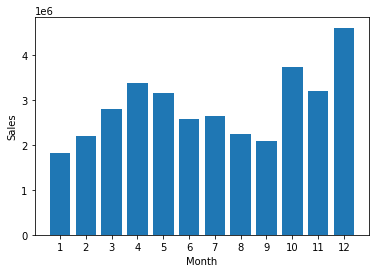

In [35]:
plt.bar(range(1,13),height=results['Sales'])
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Come si può notare dal grafico, il maggior numero di guadagni è stato fatto nel mese di Dicembre

### <span style='background :yellow'>Quale città ha il maggiore numero di vendite?

In [36]:
clean_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,2019-04-12 14:38:00,4,April
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,2019-04-30 09:27:00,4,April


#### Creazione nuova colonna "City"

In [37]:
# creo funzione da applicare
def getCity(x):
    return x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')'

clean_dataframe['City'] = clean_dataframe['Purchase Address'].apply(lambda x: getCity(x))
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA)


#### Eliminazione delle colonne che non servono all'analisi

In [38]:
small_dataframe = clean_dataframe[['Sales', 'City']]

#### Raggruppamento delle vendite per città

In [39]:
results = small_dataframe.groupby('City').sum().sort_values('City')
results

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


#### Creazione del grafico

In [40]:
cities = small_dataframe['City'].unique()
cities = np.sort(cities)
cities

array([' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)',
       ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)',
       ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)'],
      dtype=object)

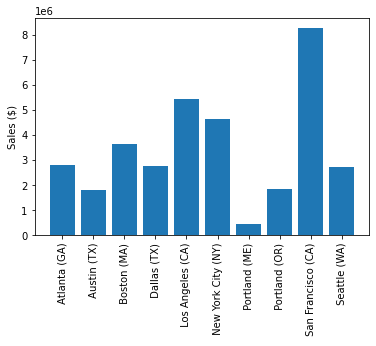

In [41]:
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
#plt.xlabel('City name')
plt.ylabel('Sales ($)')
plt.show()

Come si può notare dal grafico, San Francisco è la città con maggiore spese di acquisiti

### <span style='background :yellow'>A quale ora si dovrebbero far vedere le pubblicità per massimizzare le vendite?

In [42]:
clean_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,2019-04-12 14:38:00,4,April,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,2019-04-30 09:27:00,4,April,Los Angeles (CA)


#### Creazione nuova colonna "Sales hour"

##### Soluzione 1 (ora come stringa)

In [43]:
clean_dataframe['Sales hour'] = clean_dataframe['Order Date'].apply(lambda x: x[9:11])
clean_dataframe.head(3)
#print(clean_dataframe.dtypes)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April,Dallas (TX),08
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April,Boston (MA),22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14


##### Soluzione 2 (ora come numero)

In [44]:
clean_dataframe['Sales hour'] = clean_dataframe['Date time'].dt.hour
clean_dataframe.head(3)
#print(clean_dataframe.dtypes)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April,Boston (MA),22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14


#### Eliminazione delle colonne che non servono all'analisi

In [45]:
small_dataframe = clean_dataframe[['Sales', 'Sales hour']]
small_dataframe.head(3)

,Sales,Sales hour
0,23.90,8
1,99.99,22
2,600.00,14


#### Raggruppamento delle vendite per ora

In [46]:
results = small_dataframe.groupby('Sales hour').count()
results

,Sales
Sales hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


#### Creazione del grafico

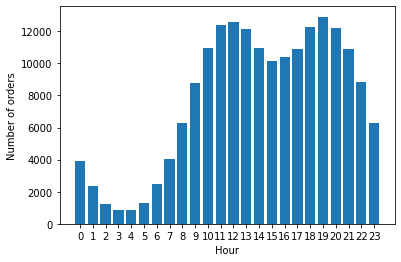

In [47]:
plt.bar(range(0,24), results['Sales'])
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()

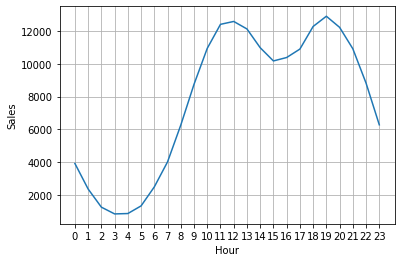

In [48]:
plt.plot(range(0,24),results['Sales'])
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()

Come si può notare dal grafico, si vende molto di più alle ore 11 e alle 19

### <span style='background :yellow'>Quali prodotti sono spesso venduti insieme?

In [49]:
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April,Boston (MA),22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14


#### Creazione di un dataframe che contiene soltanto le righe che hanno duplicati di Order ID

In [50]:
small_dataframe = clean_dataframe[clean_dataframe['Order ID'].duplicated(keep=False)] 
small_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,2019-04-12 14:38:00,4,April,Los Angeles (CA),14
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,2019-04-03 19:42:00,4,April,Los Angeles (CA),19
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,2019-04-03 19:42:00,4,April,Los Angeles (CA),19
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,2019-04-07 11:31:00,4,April,Boston (MA),11


#### Creazione nuova colonna "Grouped"

In [51]:
# small_dataframe['Product'].transform(lambda x: ', '.join(x))
# small_dataframe.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
small_dataframe = small_dataframe.assign(Grouped = small_dataframe.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)))
small_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour,Grouped
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,2019-04-12 14:38:00,4,April,Los Angeles (CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,2019-04-03 19:42:00,4,April,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,2019-04-03 19:42:00,4,April,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,2019-04-07 11:31:00,4,April,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### Eliminazione righe duplicate

In [52]:
small_dataframe = small_dataframe.drop_duplicates(subset='Order ID')
small_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour,Grouped
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,2019-04-03 19:42:00,4,April,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,2019-04-07 11:31:00,4,April,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",5.98,2019-04-10 17:00:00,4,April,San Francisco (CA),17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",14.95,2019-04-12 11:07:00,4,April,New York City (NY),11,"Lightning Charging Cable,USB-C Charging Cable"


#### Eliminazione delle colonne che non servono all'analisi

In [53]:
small_dataframe = small_dataframe[['Order ID','Grouped']]
small_dataframe.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Conteggio delle coppie di elementi spesso comprati insieme

In [54]:
from itertools import combinations
from collections import Counter
number_of_elements = 2

##### Soluzione 1 (tramite for delle righe)

In [55]:
count = Counter()

for row in small_dataframe['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,number_of_elements)))

    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Soluzione 2 (tramite apply)

In [56]:
def countElements (string,number):
    row_list = string.split(',')
    count.update(Counter(combinations(row_list,number)))

count = Counter()
small_dataframe['Grouped'].apply(lambda x: countElements(x,number_of_elements))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### <span style='background :yellow'>Quale prodotto ha venduto di più? Per quale motivo?

In [57]:
clean_dataframe.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Date time,Month,Month name,City,Sales hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,2019-04-19 08:46:00,4,April,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,2019-04-07 22:30:00,4,April,Boston (MA),22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,2019-04-12 14:38:00,4,April,Los Angeles (CA),14


#### Eliminazione delle colonne che non servono all'analisi

In [58]:
small_dataframe = clean_dataframe[['Product', 'Quantity Ordered', 'Sales']]
small_dataframe.head(3)

,Product,Quantity Ordered,Sales
0,USB-C Charging Cable,2,23.90
1,Bose SoundSport Headphones,1,99.99
2,Google Phone,1,600.00


#### Raggruppamento dei prodotti per quantità venduta

In [59]:
quantity_ordered = small_dataframe.groupby('Product')['Quantity Ordered'].sum()
quantity_ordered.head(3)

Product
20in Monitor              4129
27in 4K Gaming Monitor    6244
27in FHD Monitor          7550
Name: Quantity Ordered, dtype: int64

#### Creazione del grafico (vendite - prodotto)

In [60]:
products = small_dataframe['Product'].unique()
products = np.sort(products)
products

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

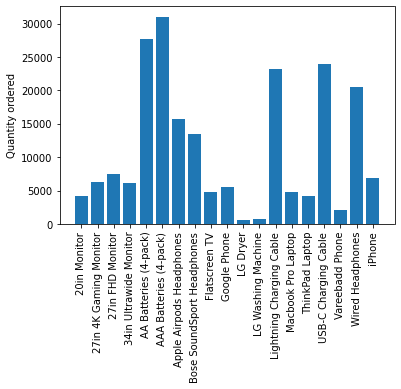

In [61]:
f, ax = plt.subplots(figsize=(6,4))
ax.bar(products, quantity_ordered)
ax.set_ylabel('Quantity ordered')
#ax.set_xlabel('Product', color='b')

ax.set_xticks(products)
ax.set_xticklabels(products, rotation='vertical', size=10)

plt.show()

#### Raggruppamento dei prodotti per costo

In [62]:
prices = clean_dataframe.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#### Creazione del grafico (costo - prodotto)

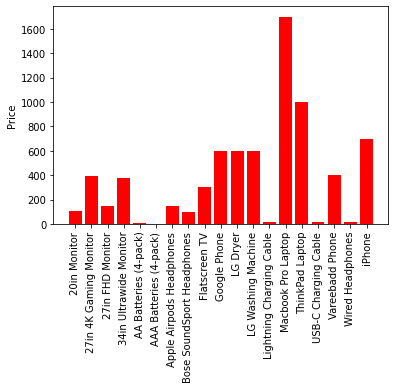

In [63]:
f, ax = plt.subplots(figsize=(6,4))
ax.bar(products, prices, color='Red')
ax.set_ylabel('Price')
#ax.set_xlabel('Product', color='b')

ax.set_xticks(products)
ax.set_xticklabels(products, rotation='vertical', size=10)

plt.show()

#### Creazione del grafico finale

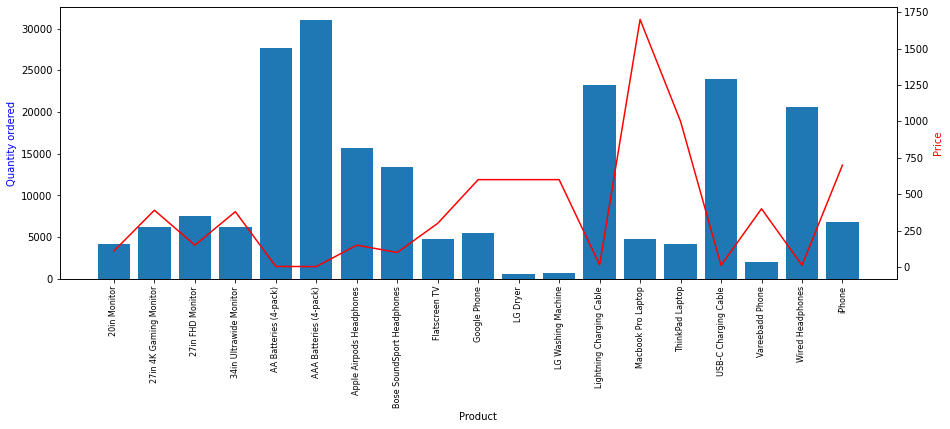

In [64]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, color='r')

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity ordered", color='b')
ax2.set_ylabel("Price", color='r')

ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

#### Salvataggio del grafico finale come immagine

In [65]:
fig.savefig('./Output/Results')